In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Paired')
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
data = pd.read_csv('data/medicare_data_disease.csv')
diseases = pd.read_csv('data/drug-disease_keys.csv')

In [13]:
spending = data.groupby('Indication').sum().sort_values(by='Total Spending', ascending=False)
spending_drug = data.groupby('Brand Name').sum().sort_values(by='Total Spending', ascending=False)

In [ ]:
plt.figure(figsize=(6,12))
g = sns.barplot(x='Total Spending', y='Indication', data=spending.reset_index()[:50], estimator=np.sum)
g.set(yticklabels=[i[:30] for i in spending[:100].index])
plt.title('Top 50 indications by Total Spending (USD) Sum from 2011 to 2015')
plt.savefig('Top_50_indications_spending.png', dpi=300, bbox_inches='tight')

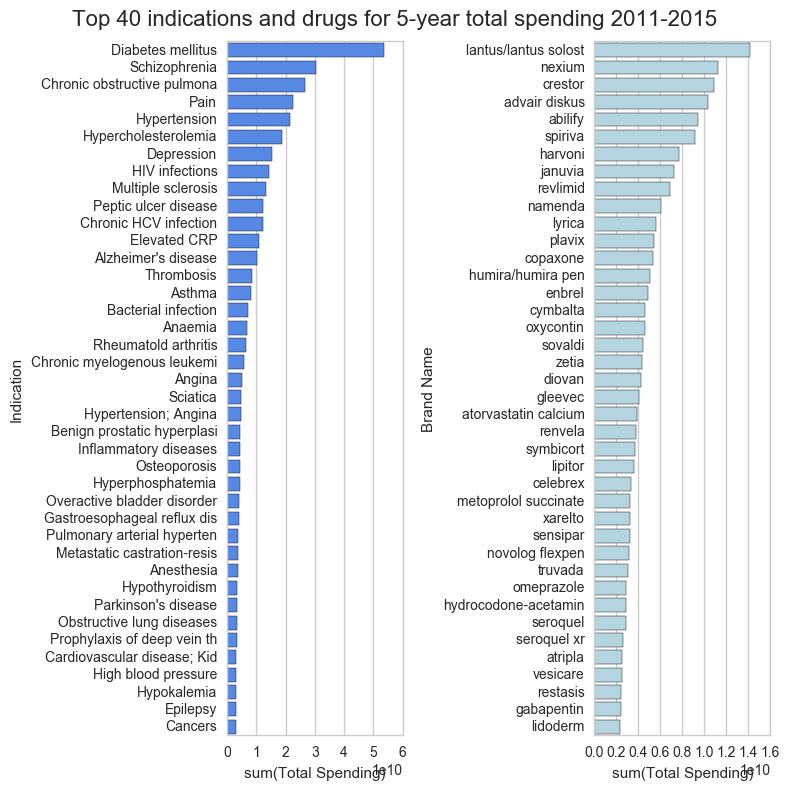

In [50]:
n_top = 40
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(8,8))
g = sns.barplot(x='Total Spending', y='Indication', data=spending.reset_index()[:n_top], estimator=np.sum, ax=ax1, 
                color=sns.xkcd_rgb['dodger blue'])
g.set(yticklabels=[i[:27] for i in spending[:n_top].index])
g2 = sns.barplot(x='Total Spending', y='Brand Name', data=spending_drug.reset_index()[:n_top], estimator=np.sum, ax=ax2,
                 color='lightblue')
g2.set(yticklabels=[i[:20] for i in spending_drug[:n_top].index])
#plt.title('Top 50 indications by Beneficiary Count Sum from 2011 to 2015')
fig.suptitle('Top %s indications and drugs for 5-year total spending 2011-2015' %n_top, size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.savefig('Top_%s_disease_drug.png' %n_top, dpi=300, bbox_inches='tight')

In [78]:
spend_2015_ind = data[data['Year']==2015].groupby('Indication').sum().sort_values(by='Total Spending', ascending=False)
spend_2015_drug = data[data['Year']==2015].groupby('Brand Name').sum().sort_values(by='Total Spending', ascending=False)

In [163]:
top_10_spend = data[data['Year']==2015].sort_values(by='Total Spending', ascending=False)[['Brand Name', 
                                                                                           'Total Spending', 
                                                                                           'Year']][:10]
top_10_spend

,Brand Name,Total Spending,Year
19770,harvoni,7.030633e+09,2015
20104,lantus/lantus solostar,4.359504e+09,2015
18926,crestor,2.883122e+09,2015
18069,advair diskus,2.270016e+09,2015
21640,spiriva,2.191466e+09,2015
19988,januvia,2.131952e+09,2015
21404,revlimid,2.077425e+09,2015
20658,nexium,2.012921e+09,2015
20291,lyrica,1.766474e+09,2015
19818,humira/humira pen,1.662292e+09,2015


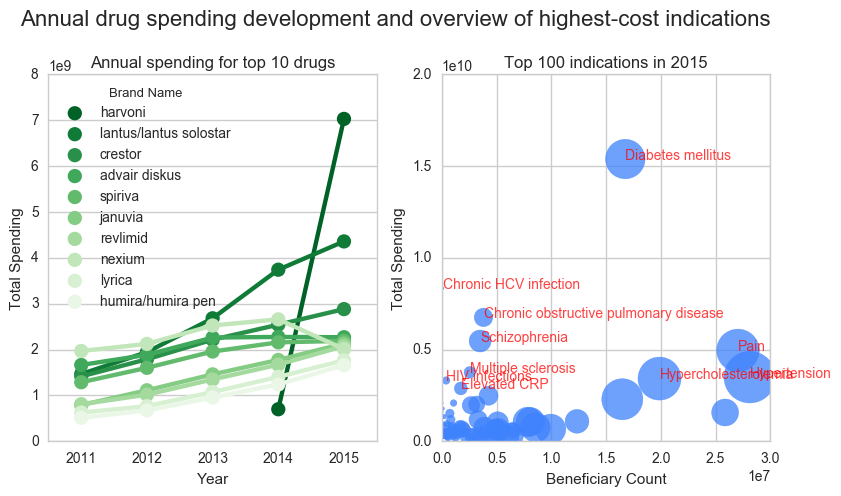

In [255]:
n_top = 40
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(8,5))

g=sns.factorplot(x='Year', y='Total Spending', hue='Brand Name', palette='Greens_r', 
                 hue_order=top_10_spend['Brand Name'],
                 data=data[data['Brand Name'].isin(top_10_spend['Brand Name'])], ax=ax1)
ax1.set_title('Annual spending for top 10 drugs')
ax1.set_ylabel('Total Spending')
plt.close(g.fig)

ax2.scatter(x=spend_2015_ind['Beneficiary Count'][:100], 
            y=spend_2015_ind['Total Spending'][:100],
            s=spend_2015_ind['Claim Count'][:100]/100000,
            #c=spend_2015_ind.reset_index()['Indication'][:100])
            color=sns.xkcd_rgb['dodger blue'], alpha=0.75)
ax2.set_title('Top 100 indications in 2015')
plt.xlabel('Beneficiary Count')
plt.ylabel('Total Spending')
plt.axis([0, None, 0, None])
for label, x, y in zip(spend_2015_ind.index, 
                       spend_2015_ind['Beneficiary Count'][:10], 
                       spend_2015_ind['Total Spending'][:10]):
    plt.annotate(label, xy=(x, y), color='red', alpha=0.75)
fig.suptitle('Annual drug spending development and overview of highest-cost indications', size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.savefig('Top_bubble_disease_drug.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.scatter(x=spend_2015_ind['Beneficiary Count'][:100], 
            y=spend_2015_ind['Total Spending'][:100],
            s=spend_2015_ind['Claim Count'][:100]/100000,
            #c=spend_2015_ind.reset_index()['Indication'][:100])
            color=sns.xkcd_rgb['dodger blue'], alpha=0.75)
ax2.set_title('Top 100 indications in 2015')
plt.xlabel('Beneficiary Count')
plt.ylabel('Total Spending')
plt.axis([0, None, 0, None])
for label, x, y in zip(spend_2015_ind.index, 
                       spend_2015_ind['Beneficiary Count'][:10], 
                       spend_2015_ind['Total Spending'][:10]):
    plt.annotate(label, xy=(x, y), color='red', alpha=0.75)
plt.show()

In [ ]:
plt.scatter(x=spend_2015_drug['Beneficiary Count'][:100], 
            y=spend_2015_drug['Total Spending'][:100],
            s=spend_2015_drug['Claim Count'][:100]/50000,
            #c=spend_2015_ind.reset_index()['Indication'][:100])
            color=sns.xkcd_rgb['dodger blue'], alpha=0.75)
ax2.set_title('Top 100 drugs in 2015')
plt.xlabel('Beneficiary Count')
plt.ylabel('Total Spending')
plt.axis([0, None, 0, None])

for label, x, y in zip(spend_2015_drug.index, spend_2015_drug['Beneficiary Count'][:10], 
                       spend_2015_drug['Total Spending'][:10]):
    plt.annotate(
        label,
        xy=(x, y),# xytext=(x, y+1),
        alpha=0.75)
        #textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

for label, x, y in zip(spend_2015_drug.sort_values('Beneficiary Count', ascending=False).index,
                       spend_2015_drug.sort_values('Beneficiary Count', ascending=False)['Beneficiary Count'][:1], 
                       spend_2015_drug.sort_values('Beneficiary Count', ascending=False)['Total Spending'][:1]):
    plt.annotate(
        label,
        xy=(x, y),# xytext=(x, y*2),
        rotation=10, #ha='right', va='bottom',
        #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
        alpha=0.75)

for label, x, y in zip(spend_2015_drug.sort_values('Claim Count', ascending=False).index,
                       spend_2015_drug.sort_values('Claim Count', ascending=False)['Beneficiary Count'][:5], 
                       spend_2015_drug.sort_values('Claim Count', ascending=False)['Total Spending'][:5]):
    plt.annotate(
        label,
        xy=(x, y),# xytext=(x, y*2),
        rotation=10, #ha='right', va='bottom',
        #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'),
        alpha=0.75)

#plt.legend()
#plt.savefig('Top_100_indications_bubbles.png', dpi=300, bbox_inches='tight')

In [154]:
'truvada' in spend_2015_drug.sort_values('Beneficiary Count', ascending=False)['Beneficiary Count'][:600].index

True

In [ ]:
sns.swarmplot(x='Indication', y='Total Spending', 
              data=data[data['Year']==2015].sort_values(by='Total Spending', ascending=False)[:1000])

In [ ]:
sns.factorplot(x='Year', y='Total Spending', data=data)

In [ ]:
sns.jointplot(x='Beneficiary Count', y='Total Spending',
              data=data[data['Year']==2015])#[data['Brand Name'].isin(top_10_spend['Brand Name'])])

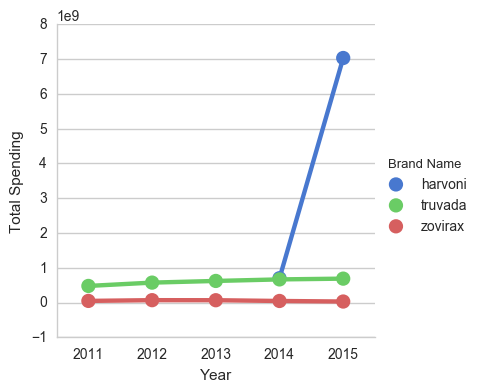

In [145]:
sns.factorplot(x='Year', y='Total Spending', hue='Brand Name', data=data[data['Brand Name'].isin(['truvada', 
                                                                                                  'zovirax', 
                                                                                                  'harvoni'])])

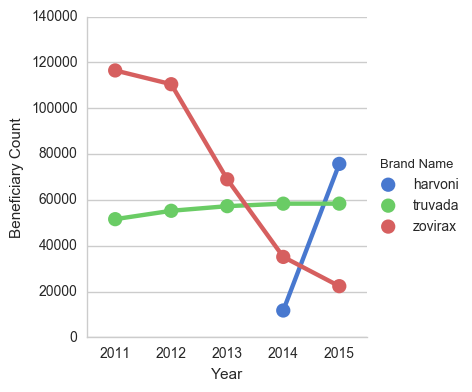

In [146]:
sns.factorplot(x='Year', y='Beneficiary Count', hue='Brand Name', data=data[data['Brand Name'].isin(['truvada', 
                                                                                                  'zovirax', 
                                                                                                  'harvoni'])])